In [1]:
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:

get_ipython().run_line_magic('matplotlib', 'inline')
# row 생략 없이 출력
pd.set_option('display.max_rows', None)
# col 생략 없이 출력
pd.set_option('display.max_columns', None)

laptop = pd.read_csv('Cleaned_Laptop_data.csv')

print(laptop.shape) # (896,23) float(1), int(7) object(15)
print(laptop.info())


(896, 23)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 896 entries, 0 to 895
Data columns (total 23 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   brand            896 non-null    object 
 1   model            896 non-null    object 
 2   processor_brand  896 non-null    object 
 3   processor_name   896 non-null    object 
 4   processor_gnrtn  896 non-null    object 
 5   ram_gb           896 non-null    object 
 6   ram_type         896 non-null    object 
 7   ssd              896 non-null    object 
 8   hdd              896 non-null    object 
 9   os               896 non-null    object 
 10  os_bit           896 non-null    object 
 11  graphic_card_gb  896 non-null    int64  
 12  weight           896 non-null    object 
 13  display_size     896 non-null    object 
 14  warranty         896 non-null    int64  
 15  Touchscreen      896 non-null    object 
 16  msoffice         896 non-null    object 
 17  latest

In [3]:
# laptop.info()
laptop['processor_gnrtn'] = laptop['processor_gnrtn'].str.replace('Missing', '')
laptop['processor_gnrtn'] = laptop['processor_gnrtn'].str.replace('th', '')
laptop['processor_gnrtn'] = pd.to_numeric(laptop['processor_gnrtn'])

laptop['display_size'] = laptop['display_size'].str.replace('Missing', '')
laptop['display_size'] = pd.to_numeric(laptop['display_size'])

# 필요없는 칼럼인 ‘model’ 제거
# 범주형 데이터인 ‘brand’ 값을 One-Hot Encoding
# ‘brand’ feature의 값이 많아지는 만큼 칼럼이 추가 되므로 데이터프레임이 비대해지는 것을 방지하기 위해 상위 8개의 브랜드(ASUS, DELL, … APPLE)을 제외한 나머지 ’brand’는 ’Other’로 통일
# (*One-Hot Encoding : 피처 값의 유형에 따라 새로운 피처를 추가해 고유 값에 해당하는 칼럼에만 1을 표시하고 나머지 칼럼에는 0을 표시하는 방법)

# 참고 : https://john-analyst.medium.com/%EB%8D%B0%EC%9D%B4%ED%84%B0-%EC%A0%84%EC%B2%98%EB%A6%AC-%EB%A0%88%EC%9D%B4%EB%B8%94-%EC%9D%B8%EC%BD%94%EB%94%A9%EA%B3%BC-%EC%9B%90%ED%95%AB-%EC%9D%B8%EC%BD%94%EB%94%A9-f0220df21df1



In [4]:
# isnull_series = laptop.isnull().sum()
# print('\nNull 칼럼과 그 건수:\n', isnull_series[isnull_series>0].sort_values(ascending=False))

laptop.drop(columns='model')

conditions = [
    (laptop['brand'] == "ASUS"),
    (laptop['brand'] == "DELL"),
    (laptop['brand'] == "Lenovo"),
    (laptop['brand'] == "HP"),
    (laptop['brand'] == "acer"),
    (laptop['brand'] == "MSI"),
    (laptop['brand'] == "APPLE"),
    (laptop['brand'] == "Avita")
]

choice = ["ASUS", "DELL", "Lenovo", "HP", "acer", "MSI", "APPLE", "Avita"]

laptop['brand'] = np.select(conditions, choice, default="Other")

# 범주형 데이터인 ‘processor_name’ 값을 One-Hot Encoding
# ‘processor_name’ feature의 값이 많아지는 만큼 칼럼이 추가 되므로 데이터프레임이 비대해지는 것을 방지하기 위해 상위 11개의 항목(Core i5, Core i3, … Ryzen 3)을 제외한 나머지 ’processor_name’은 ’Other_P’로 통일


In [5]:
conditions = [
    (laptop['processor_name'] == "Core i5"),
    (laptop['processor_name'] == "Core i3"),
    (laptop['processor_name'] == "Core i7"),
    (laptop['processor_name'] == "Ryzen 5"),
    (laptop['processor_name'] == "Ryzen 7"),
    (laptop['processor_name'] == "Ryzen 9"),
    (laptop['processor_name'] == "Ryzen 3"),
    (laptop['processor_name'] == "Celeron Dual"),
    (laptop['processor_name'] == "M1"),
    (laptop['processor_name'] == "Pentium Quad"),
    (laptop['processor_name'] == "Core i9")
]

choice = ["Core i5", "Core i3", "Core i7", "Ryzen 5", "Ryzen 7", "Ryzen 9", "Ryzen 3", "Celeron Dual", "M1.1", "Pentium Quad", "Core i9"]

# 상위 11개를 제외한 'processor_name'을 "Other_P"로 통일
laptop['processor_name'] = np.select(conditions, choice, default="Other_P")

# 범주형 데이터 -> ‘brand’, ‘processor_brand’, ‘processor_name’, ‘os’, ‘ram_type’
# One-Hot Encoding 과정을 거쳐 각 value 값을 feature화 후 binary 데이터 주입

In [6]:
laptop_temp = laptop.copy()
brand_dummies = pd.get_dummies(laptop_temp.brand)

# 'brand' 칼럼 OneHot Encoding
laptop_temp = pd.concat([laptop_temp,brand_dummies], axis= 'columns')

In [7]:
# 'processor_brand' 칼럼 OneHot Encoding
processor_brand_dummies = pd.get_dummies(laptop_temp.processor_brand)

laptop_temp = pd.concat([laptop_temp, processor_brand_dummies], axis='columns')

In [8]:
# 'processor_name' 칼럼 OneHot Encoding
processor_name_dummies = pd.get_dummies(laptop_temp.processor_name)

laptop_temp = pd.concat([laptop_temp, processor_name_dummies], axis='columns')

In [9]:
# 원 핫 인코딩한 brand, processor_name, processor_brand 피처 데이터 삭제
laptop_temp = laptop_temp.drop(columns=['brand', 'processor_name', 'processor_brand'])

os_dummies = pd.get_dummies(laptop_temp.os)

laptop_temp = pd.concat([laptop_temp, os_dummies], axis='columns')

In [10]:
# ram_type 피처에 대하여 원 핫 인코딩
ram_type_dummies = pd.get_dummies(laptop_temp.ram_type)

laptop_temp = pd.concat([laptop_temp, ram_type_dummies], axis='columns')

In [11]:
# ‘weight’ 칼럼을 직관적으로 수치화
# Casual = 1.5(kg), ThinNlight = 1.0(kg), Gaming = 2.5(kg)

conditions = [
    (laptop['weight'] == "Casual"),
    (laptop['weight'] == "ThinNlight"),
    (laptop['weight'] == "Gaming")
]

# Casual = 1.5, ThinNlight = 1.0, Gaming = 2.5
choice = [1.5, 1.0, 2.5]

laptop_temp['weight'] = np.select(conditions, choice, default=1.4)

laptop_temp

,model,processor_gnrtn,ram_gb,ram_type,ssd,hdd,os,os_bit,graphic_card_gb,weight,display_size,warranty,Touchscreen,msoffice,latest_price,old_price,discount,star_rating,ratings,reviews,APPLE,ASUS,Avita,DELL,HP,Lenovo,MSI,Other,acer,AMD,Intel,M1,MediaTek,Qualcomm,Celeron Dual,Core i3,Core i5,Core i7,Core i9,M1.1,Other_P,Pentium Quad,Ryzen 3,Ryzen 5,Ryzen 7,Ryzen 9,DOS,Mac,Windows,DDR3,DDR4,DDR5,LPDDR3,LPDDR4,LPDDR4X
0,A6-9225,10.0,4 GB GB,DDR4,0 GB,1024 GB,Windows,64-bit,0,1.0,NaN,0,No,No,24990,32790,23,3.7,63,12,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,1,0,0,0,0
1,Ideapad,10.0,4 GB GB,DDR4,0 GB,512 GB,Windows,64-bit,0,1.5,NaN,0,No,No,19590,21325,8,3.6,1894,256,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,1,0,0,0,0
2,PURA,10.0,4 GB GB,DDR4,128 GB,0 GB,Windows,64-bit,0,1.0,NaN,0,No,No,19990,27990,28,3.7,1153,159,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,1,0,0,0,0
3,PURA,10.0,4 GB GB,DDR4,128 GB,0 GB,Windows,64-bit,0,1.0,NaN,0,No,No,21490,27990,23,3.7,1153,159,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,1,0,0,0,0
4,PURA,10.0,4 GB GB,DDR4,256 GB,0 GB,Windows,64-bit,0,1.0,NaN,0,No,No,24990,33490,25,3.7,1657,234,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,1,0,0,0,0
5,PURA,10.0,8 GB GB,DDR4,256 GB,0 GB,Windows,64-bit,0,1.0,14.00,0,No,No,24990,33490,25,3.7,1657,234,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,1,0,0,0,0
6,APU,10.0,4 GB GB,DDR4,0 GB,1024 GB,Windows,32-bit,0,1.5,14.00,0,No,No,20900,22825,8,3.9,1185,141,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,1,0,0,0,0
7,APU,10.0,4 GB GB,DDR4,0 GB,1024 GB,Windows,64-bit,0,1.5,NaN,0,No,No,21896,0,0,3.9,219,18,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,1,0,0,0,0
8,Athlon,10.0,32 GB GB,DDR4,32 GB,0 GB,Windows,32-bit,4,1.5,14.00,0,No,No,26899,27668,2,0.0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,1,0,0,0,0
9,Aspire,10.0,4 GB GB,DDR4,256 GB,0 GB,Windows,64-bit,0,1.5,NaN,1,No,No,31990,36990,13,4.2,76,13,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,1,0,0,0,0


In [12]:
# 피처 데이터에서 문자열 제거
laptop_temp['hdd'] = laptop['hdd'].str.replace('GB', '')
laptop_temp['ram_gb'] = laptop['ram_gb'].str.replace('GB GB', '')
laptop_temp['ssd'] = laptop['ssd'].str.replace('GB', '')
laptop_temp['os_bit'] = laptop_temp['os_bit' ].str.replace('-bit','')

# 필요 없는 피처 데이터 제거
laptop_temp = laptop_temp.drop(columns=['model','os', 'ram_type','reviews','discount'])

# ram_gb, hdd, ssd, os_bit의 데이터에서 단위 char 제거
# ‘model’, ‘os’, ‘ram_type’, 'reviews' 칼럼


In [13]:
from sklearn.preprocessing import LabelEncoder

lb = LabelEncoder()

string_category = ['Touchscreen', 'msoffice']

# LabenEncoder를 활용하여 'Touchscreen', 'msoffice' 데이터 수치화 True -> 1, False -> 0
laptop_temp[string_category] = laptop_temp[string_category].apply(lb.fit_transform)

In [14]:
# star_rating과 rating 피처에서 0인 값들을 채워주기 위해 값이 있는 레이블에 대하여 weight를 부여하여 값을 채워넣었다
percentile = 0.6 # 상위 60퍼센트에 대해서만 rating 나타냄
C = laptop_temp['star_rating'].mean()
m = laptop_temp['ratings'].quantile(percentile)

def weighted_vote_average(rating):
    v = rating['ratings']
    R = rating['star_rating']

    return ( (v/(v+m)) * R) + ( (m/(m+v)) * C )

laptop_temp['weighted_vote'] = laptop_temp.apply(weighted_vote_average, axis=1)


In [15]:
laptop_temp.drop(['star_rating','ratings',], axis=1, inplace=True) #weighed_vote로 피처 데이터를 나타냈으므로 star_rating과 rating 피처를 삭제

In [16]:
laptop = laptop_temp.copy()

In [17]:
# 문자열 데이터를 숫자형 데이터로 변환
laptop['ram_gb'] = pd.to_numeric(laptop['ram_gb'])
laptop['ssd'] = pd.to_numeric(laptop['ssd'])
laptop['hdd'] = pd.to_numeric(laptop['hdd'])
laptop['os_bit'] = pd.to_numeric(laptop['os_bit'])

In [18]:
from sklearn.ensemble import BaggingRegressor
from sklearn.tree import DecisionTreeRegressor

# Missing 데이터를 현재 빈 문자열 데이터로 둔 상태인데
# 다른 feature 데이터를 활용하여 채워줘야함
# tree regression은 빈 데이터들이 존재할 때도 활용할 수 있는 모델이지만 완벽하지는 않음
# tree regression 모델만 활용하여 빈 데이터 값을 채울때 주의점
# High Variance -> 훈련 데이터셋이 변동될 시 결과값의 변동이 큼 ==> 따라서 tree regression 모델을 여러개(ensemble)를 활용하여 나온 결과값의 평균값을 활용
# 데이터 셋을 tree regression 모델의 숫자 만큼 나눠야하지만 가지고 있는 데이터 셋의 row 갯수는 896개 뿐 ==> bootstrap하여 tree regression 모델만큼 데이터셋 리샘플링 (Bagging)
# 위의 두 문제를 한번에 해결해주는 것이 Bagged Tree regression 모델

# 참고 : https://www.kaggle.com/code/nkitgupta/advance-data-preprocessing, https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.BaggingRegressor.html

def tree_imputation(df):
    missing_cols = [col for col in df.columns if df[col].isnull().sum() > 0]
    non_missing_cols = [col for col in df.columns if df[col].isnull().sum() == 0]
    # num_cols = [col for col in missing_cols if df[col].dtype != 'object']

    # df = df[num_cols]
    for col in missing_cols:

        # Defining a new bagging model for each attribute
        model = BaggingRegressor(DecisionTreeRegressor(), n_estimators = 40, max_samples = 1.0, max_features = 1.0, bootstrap = False, n_jobs = -1)

        col_missing = df[df[col].isnull()]
        temp = df.drop(df[df[col].isnull()].index, axis = 0)

        # print(temp.columns)
        # X = temp.drop(col, axis = 1)
        X = temp.loc[:, non_missing_cols]
        y = temp[col]

        model.fit(X, y)

        y_pred = model.predict(col_missing[non_missing_cols])
        # col_missing[col] = y_pred

        df.loc[col_missing.index, col] = y_pred

    return df

In [19]:
# Bagged Tree 모델을 활용하여 예측된 값들을 processor_gnrtn, display_size 피처 데이터에
# Missing으로 들어가있던 빈 문자열 데이터들에 값을 넣어준다.

laptop_tree = tree_imputation(laptop)
laptop = laptop_tree

In [20]:
# 17인치 이상인 노트북의 경우 게이밍 노트북일 경우가 많은데 성능이 게이밍 노트북과 유사하지 않고, 가격은 동 떨어져있어서 이상치 데이터로 간주하고 제거
cond = laptop['display_size'] > 17
outlier_index = laptop[cond].index

laptop.drop(outlier_index, axis=0, inplace=True)

In [21]:
log_latest_price = np.log1p(laptop['latest_price'])

In [22]:
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

In [23]:
laptop['latest_price'] = log_latest_price # 로그 변환한 target data
y_target = laptop['latest_price']
X_features = laptop.drop('latest_price', axis=1, inplace=False)

X_train, X_test, y_train, y_test = train_test_split(X_features, y_target, test_size=0.2, random_state=156)

def get_rmse(model): # 모델들에 대한 rmse
    pred = model.predict(X_test)
    mse = mean_squared_error(y_test, pred)
    rmse = np.sqrt(mse)
    print(model.__class__.__name__, '로그 변환된 RMSE: ', np.round(rmse, 3))
    return rmse

def get_rmses(models):
    rmses = []
    for model in models:
        rmse = get_rmse(model)
        rmses.append(rmse)
    return rmses

# LinearRegression, Ridge, Lasso 학습, 예측, 평가
lr_reg = LinearRegression()
lr_reg.fit(X_train, y_train)
ridge_reg = Ridge()
ridge_reg.fit(X_train, y_train)
lasso_reg = Lasso()
lasso_reg.fit(X_train, y_train)

models = [lr_reg, ridge_reg, lasso_reg]


In [24]:
def get_top_bottom_coef(model, n=10):
    # coef_ 속성을 기반으로 Series 객체를 생성. index는 칼럼명
    coef = pd.Series(model.coef_, index=X_features.columns)


    # +상위 10개, -하위 10개의 회귀 계수를 추출해 반환
    coef_high = coef.sort_values(ascending=False).head(n)
    coef_low = coef.sort_values(ascending=False).tail(n)
    return coef_high, coef_low

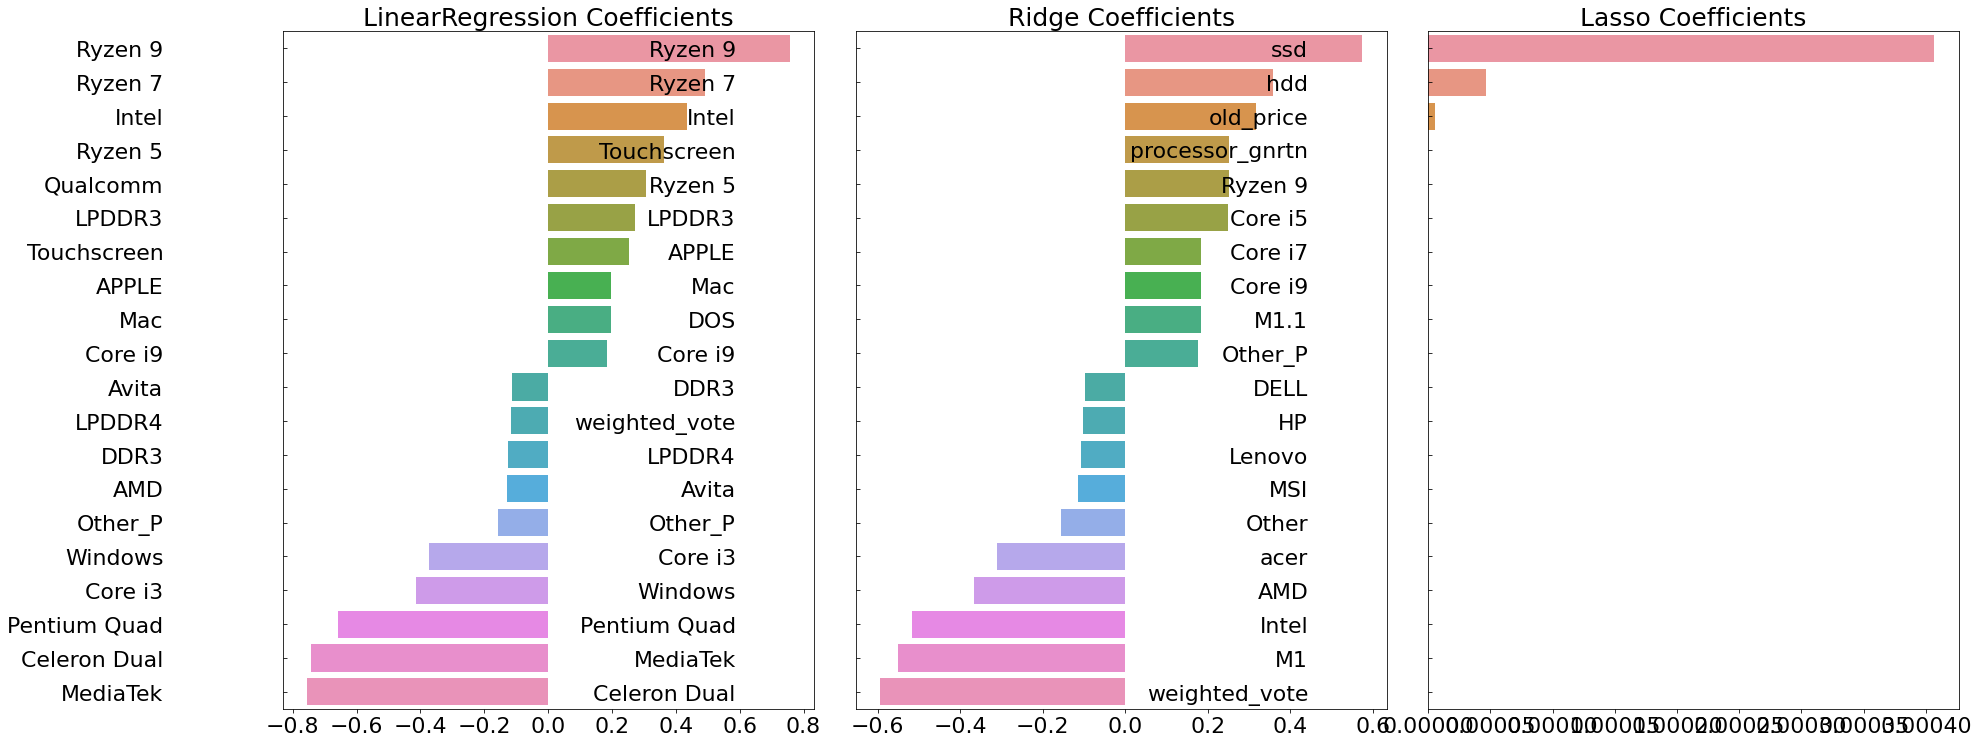

In [25]:
def visualize_coefficient(models):
    # 3개 회귀 모델이 시각화를 위해 3개의 칼럼을 가지는 subplot 생성
    fig, axs = plt.subplots(figsize=(24,10), nrows=1, ncols=3)
    fig.tight_layout()
    # 입력 인자로 받은 list 객체인 models에서 차례로 models을 추출해 회귀 계수 시각화.
    for i_num, model in enumerate(models):
        # 상위 10개, 하위 10개 회귀 계수를 구하고, 이를 판다스 concat으로 결합
        coef_high, coef_low = get_top_bottom_coef(model)
        coef_concat = pd.concat([coef_high, coef_low])
        # ax subplot에 barchar로 표현. 한 화면에 표현하기 위해 tick label 위치와 font 크기 조정.
        axs[i_num].set_title(model.__class__.__name__+' Coefficients', size=25)
        axs[i_num].tick_params(axis="y", direction="in", pad=120)
        for label in (axs[i_num].get_xticklabels() + axs[i_num].get_yticklabels()):
            label.set_fontsize(22)
        sns.barplot(x=coef_concat.values, y=coef_concat.index, ax=axs[i_num])

    # 앞 예제에서 학습한 lr_reg, ridge_reg, lasso_reg 모델의 회귀 계수 시각화
models = [lr_reg, ridge_reg, lasso_reg]
visualize_coefficient(models)





In [26]:
from sklearn.model_selection import cross_val_score

def get_avg_rmse_cv(models):
    for model in models:
        # 분할하지 않고, 전체 데이터로 cross_val_score() 수행. 모델별 CV RMSE값과 평균 RMSE 출력
        rmse_list = np.sqrt(-cross_val_score(model, X_features, y_target,
                                             scoring="neg_mean_squared_error", cv=5))
        rmse_avg = np.mean(rmse_list)
        print('\n{0} CV RMSE 값 리스트: {1}'.format(model.__class__.__name__, np.round(rmse_list, 3)))
        print('{0} CV 평균 RMSE 값: {1}'.format(model.__class__.__name__, np.round(rmse_avg, 3)))

# 앞 예제에서 학습한 lr_reg, ridge_reg, lasso_reg 도델의 CV RMSE 값 출력
models = [lr_reg, ridge_reg, lasso_reg]
get_avg_rmse_cv(models)






LinearRegression CV RMSE 값 리스트: [0.15  0.217 0.194 0.371 0.548]
LinearRegression CV 평균 RMSE 값: 0.296

Ridge CV RMSE 값 리스트: [0.163 0.217 0.194 0.388 0.475]
Ridge CV 평균 RMSE 값: 0.287

Lasso CV RMSE 값 리스트: [0.352 0.293 0.306 0.474 0.246]
Lasso CV 평균 RMSE 값: 0.334


In [27]:
# 모델별로 최적화 하이퍼 파라미터 작업을 반복적으로 수행하므로 이를 위한 별도의 함수 생성

from sklearn.model_selection import GridSearchCV

def print_best_params(model, params):
    grid_model = GridSearchCV(model, param_grid=params,
                              scoring='neg_mean_squared_error', cv=5)
    grid_model.fit(X_features, y_target)
    rmse = np.sqrt(-1*grid_model.best_score_)
    print('{0} 5 CV 시 최적 평균 RMSE 값: {1}, 최적 alpha: {2}'.format(model.__class__.__name__,
                                                               np.round(rmse,4), grid_model.best_params_))

ridge_params = {'alpha': [0.05,0.1, 1, 5, 8, 10, 12, 15, 20]}
lasso_params = {'alpha': [0.001, 0.005, 0.008, 0.05, 0.03, 0.1, 0.5, 1, 5, 10]}
print_best_params(ridge_reg, ridge_params)
print_best_params(lasso_reg, lasso_params)



Ridge 5 CV 시 최적 평균 RMSE 값: 0.2897, 최적 alpha: {'alpha': 20}
Lasso 5 CV 시 최적 평균 RMSE 값: 0.2972, 최적 alpha: {'alpha': 0.005}


LinearRegression 로그 변환된 RMSE:  0.19
Ridge 로그 변환된 RMSE:  0.198
Lasso 로그 변환된 RMSE:  0.202


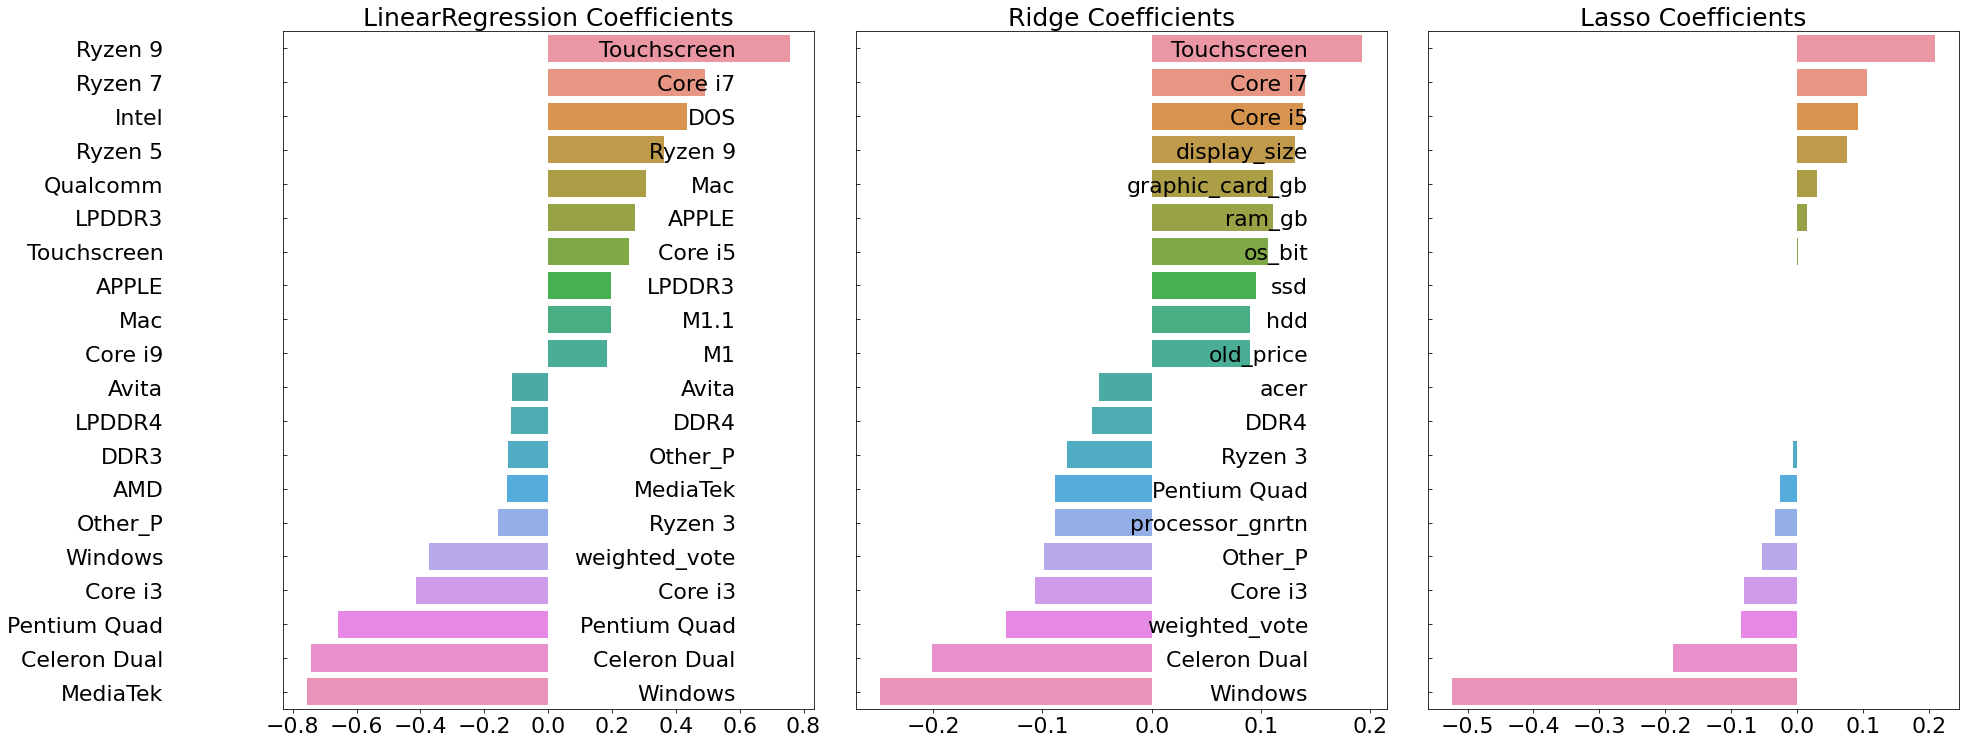

In [28]:
# 앞의 최적화 alpha 값으로 학습 데이터로 학습, 테스트 데이터로 예측 및 평가 수행.
lr_reg = LinearRegression()
lr_reg.fit(X_train, y_train)  # linear regression 학습
ridge_reg = Ridge(alpha=20)
ridge_reg.fit(X_train, y_train)  # ridge regression alpha=20으로 학습 수행
lasso_reg = Lasso(alpha=0.005)
lasso_reg.fit(X_train, y_train)  # lasso regression alpha=0.005으로 학습 수행

# 모든 파일의 RMSE 출력
models = [lr_reg, ridge_reg, lasso_reg]
get_rmses(models)

# 모든 모델의 회귀 계수 시각화
models = [lr_reg, ridge_reg, lasso_reg]
visualize_coefficient(models)


In [29]:
laptop2 = laptop.reindex(columns=['processor_gnrtn','ram_gb','ssd','hdd','os_bit','graphic_card_gb','weight','display_size','warranty','latest_price','old_price','weighted_vote']) # stats 모듈을 사용하기 위해서 원 핫 인코딩이 아닌 피처 데이터를 적용해야 하므로 따로 분리한다.


In [31]:
from scipy.stats import skew

# object가 아닌 숫자형 피처의 칼럼 index 객체 추출.
feature_index= laptop2.dtypes.index
# house_df에 칼럼 index를 []로 입력하면 해당하는 칼럼 데이터 세트 반환. apply lambda로 skew() 호출.
skew_features = laptop2[feature_index].apply(lambda x: skew(x))
# skew(왜곡) 정도가 1 이상인 칼럼만 추출.
skew_feature_top = skew_features[skew_features >1]
print(skew_feature_top.sort_values(ascending=False))

old_price          1.590317
graphic_card_gb    1.571593
hdd                1.382553
ssd                1.291398
ram_gb             1.224810
weight             1.143679
dtype: float64


In [32]:
laptop[skew_feature_top.index] = np.log1p(laptop2[skew_feature_top.index])


# # 왜곡 정도가 높은 피처를 로그 변환했으므로 다시 원-핫 인코딩을 적용하고 피처/타깃 데이터 세트 생성
# laptop_ohe = pd.get_dummies(laptop)
y_target = laptop['latest_price']
X_features = laptop.drop('latest_price', axis=1, inplace=False)
X_train, X_test, y_train, y_test = train_test_split(X_features, y_target, test_size=0.2,
                                                    random_state=156)

# 피처를 로그 변환한 후 다시 최적 하이퍼 파라미터와 RMSE 출력
ridge_params = {'alpha':[0.05, 0.1, 1, 5, 8, 10, 12, 15, 20 ]}
lasso_params = {'alpha':[0.001, 0.005, 0.008, 0.05, 0.03, 0.1, 0.5, 1, 5, 10]}
print_best_params(ridge_reg, ridge_params)
print_best_params(lasso_reg, lasso_params)


Ridge 5 CV 시 최적 평균 RMSE 값: 0.3763, 최적 alpha: {'alpha': 5}
Lasso 5 CV 시 최적 평균 RMSE 값: 0.3866, 최적 alpha: {'alpha': 0.001}


LinearRegression 로그 변환된 RMSE:  0.196
Ridge 로그 변환된 RMSE:  0.213
Lasso 로그 변환된 RMSE:  0.206
661    11.361998
702    10.518430
849    11.340843
35     10.446684
464    10.950649
710    10.633232
88     10.657048
478    10.705489
861    11.512835
682    10.736201
884    11.863519
457    10.757711
412    11.170168
173    10.545368
200    10.630819
823    11.018482
395    11.211699
873    11.652609
601    11.542397
62     10.819598
715    10.491024
465    11.034744
166    10.504821
821    10.950649
212    10.126271
552    11.361998
631    12.170399
772    10.916742
351    11.170308
97     10.518430
390    11.154821
208    10.239638
850    11.635063
789    10.907624
354    11.082004
79     10.778956
577    11.812963
477    10.753446
71     10.570573
137    10.668746
525    10.968043
93     10.751307
286    10.914925
362    11.198091
89     10.645211
844    11.289669
870    12.206028
322    11.148953
197    10.621108
227    10.877877
475    12.100662
686    10.403990
38     10.433557
56     10.

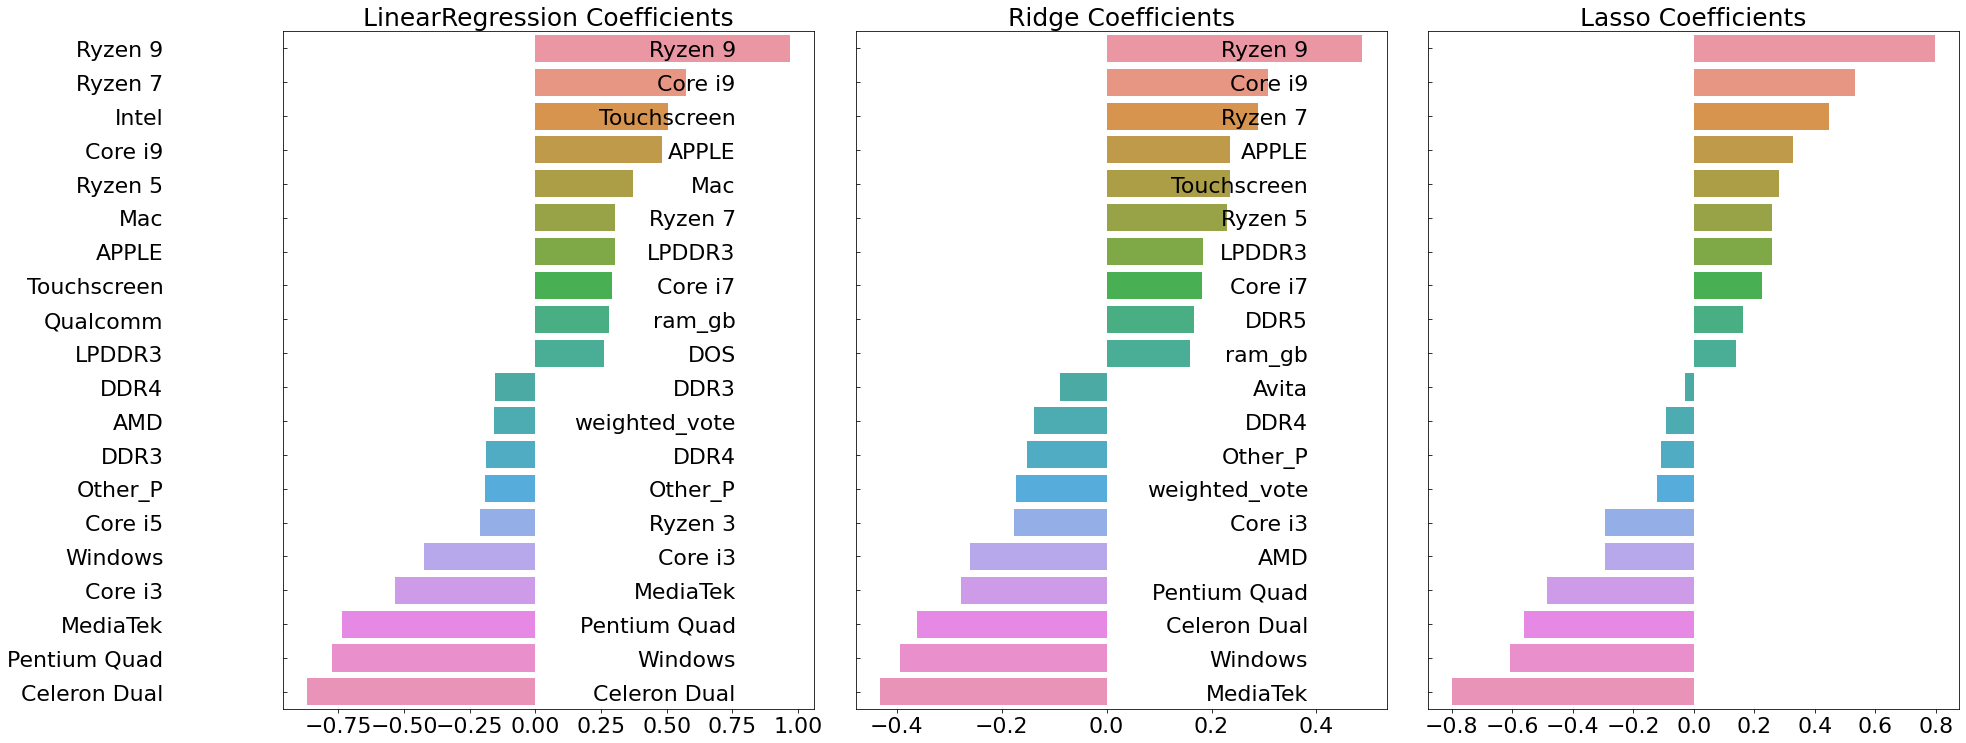

In [45]:
# 앞의 최적화 alpha 값으로 학습 데이터로 학습, 테스트 데이터로 예측 및 평가 수행.
lr_reg = LinearRegression()
lr_reg.fit(X_train, y_train)  # linear regression 학습 수행
ridge_reg = Ridge(alpha=5)  # ridge regression alpha=5로 학습 수행
ridge_reg.fit(X_train, y_train)
lasso_reg = Lasso(alpha=0.001)  # lasso regression alpha=0.001으로 학습 수행
lasso_reg.fit(X_train, y_train)

# 모든 파일의 RMSE 출력
models = [lr_reg, ridge_reg, lasso_reg]
get_rmses(models)

# 모든 모델의 회귀 계수 시각화
models = [lr_reg, ridge_reg, lasso_reg]
visualize_coefficient(models)
# test_laptop = pd.read_csv('Laptop.csv')
#
# test_laptop.info()
# test_laptop.head()

In [34]:
from sklearn.model_selection import KFold
from sklearn.metrics import mean_absolute_error

In [35]:
 # 개별 기반 모델 -> 최종 메타 모델이 사용할 학습 및 테스트용 데이터를 생성하기 위한 함수.
def stacking_base_datasets(model, X_train_n, y_train_n, X_test_n, n_folds ):
    # 지정된 n_folds값으로 KFold 생성.
    kf = KFold(n_splits=n_folds, shuffle=True, random_state=0)

    #추후에 메타 모델이 사용할 학습 데이터 반환을 위한 넘파이 배열 초기화
    train_fold_pred = np.zeros((X_train_n.shape[0] ,1 ))
    test_pred = np.zeros((X_test_n.shape[0],n_folds))
    print(model.__class__.__name__ , ' model 시작 ')

    for folder_counter , (train_index, valid_index) in enumerate(kf.split(X_train_n)):
        #입력된 학습 데이터에서 기반 모델이 학습/예측할 폴드 데이터 셋 추출
        print('\t 폴드 세트: ',folder_counter,' 시작 ')
        X_tr = X_train_n[train_index]
        y_tr = y_train_n[train_index]
        X_te = X_train_n[valid_index]

        #폴드 세트 내부에서 다시 만들어진 학습 데이터로 기반 모델의 학습 수행.
        model.fit(X_tr , y_tr)
        #폴드 세트 내부에서 다시 만들어진 검증 데이터로 기반 모델 예측 후 데이터 저장.
        train_fold_pred[valid_index, :] = model.predict(X_te).reshape(-1,1)
        #입력된 원본 테스트 데이터를 폴드 세트내 학습된 기반 모델에서 예측 후 데이터 저장.
        test_pred[:, folder_counter] = model.predict(X_test_n)

    # 폴드 세트 내에서 원본 테스트 데이터를 예측한 데이터를 평균하여 테스트 데이터로 생성
    test_pred_mean = np.mean(test_pred, axis=1).reshape(-1,1)

    #train_fold_pred는 최종 메타 모델이 사용하는 학습 데이터, test_pred_mean은 테스트 데이터
    return train_fold_pred , test_pred_mean

In [36]:
# get_stacking_base_datasets( )은 넘파이 ndarray를 인자로 사용하므로 DataFrame을 넘파이로 변환.
X_train_n = X_train.values
X_test_n = X_test.values
y_train_n = y_train.values

# 각 개별 기반(Base)모델이 생성한 학습용/테스트용 데이터 반환.
#Linear Regression
linear_train, linear_test = stacking_base_datasets(lr_reg, X_train_n, y_train_n, X_test_n, 5)
# Ridge
ridge_train, ridge_test = stacking_base_datasets(ridge_reg, X_train_n, y_train_n, X_test_n, 5)
#Lasso
lasso_train, lasso_test = stacking_base_datasets(lasso_reg, X_train_n, y_train_n, X_test_n, 5)

LinearRegression  model 시작 
	 폴드 세트:  0  시작 
	 폴드 세트:  1  시작 
	 폴드 세트:  2  시작 
	 폴드 세트:  3  시작 
	 폴드 세트:  4  시작 
Ridge  model 시작 
	 폴드 세트:  0  시작 
	 폴드 세트:  1  시작 
	 폴드 세트:  2  시작 
	 폴드 세트:  3  시작 
	 폴드 세트:  4  시작 
Lasso  model 시작 
	 폴드 세트:  0  시작 
	 폴드 세트:  1  시작 
	 폴드 세트:  2  시작 
	 폴드 세트:  3  시작 
	 폴드 세트:  4  시작 


In [37]:
# 개별 모델이 반환한 학습 및 테스트용 데이터 세트를 Stacking 형태로 결합.
Stack_final_X_train = np.concatenate((linear_train, ridge_train, lasso_train), axis=1)
Stack_final_X_test = np.concatenate((linear_test, ridge_test, lasso_test), axis=1)

# 최종 메타 모델은 라쏘 모델을 적용.
meta_model_lasso = Lasso(alpha=0.001)

#기반 모델의 예측값을 기반으로 새롭게 만들어진 학습 및 테스트용 데이터로 예측하고 RMSE 측정.
meta_model_lasso.fit(Stack_final_X_train, y_train)
final = meta_model_lasso.predict(Stack_final_X_test)
mse = mean_squared_error(y_test , final)
rmse = np.sqrt(mse)
print('스태킹 회귀 모델의 최종 RMSE 값은:', rmse)

스태킹 회귀 모델의 최종 RMSE 값은: 0.19908970389538014


In [38]:
my_predictions = {}

colors = ['r', 'c', 'm', 'y', 'k', 'khaki', 'teal', 'orchid', 'sandybrown',
          'greenyellow', 'dodgerblue', 'deepskyblue', 'rosybrown', 'firebrick',
          'deeppink', 'crimson', 'salmon', 'darkred', 'olivedrab', 'olive',
          'forestgreen', 'royalblue', 'indigo', 'navy', 'mediumpurple', 'chocolate',
          'gold', 'darkorange', 'seagreen', 'turquoise', 'steelblue', 'slategray',
          'peru', 'midnightblue', 'slateblue', 'dimgray', 'cadetblue', 'tomato'
         ]  # plot에 color 입력


# prediction plot
def plot_predictions(name_, actual, pred):
    df = pd.DataFrame({'actual': y_test, 'prediction': pred})
    df = df.sort_values(by='actual').reset_index(drop=True)

    plt.figure(figsize=(12, 9))
    plt.scatter(df.index, df['prediction'], marker='x', color='r')
    plt.scatter(df.index, df['actual'], alpha=0.7, marker='o', color='black')
    plt.title(name_, fontsize=15)
    plt.legend(['prediction', 'actual'], fontsize=12)
    plt.show()  # model에 대한 예측값과 실제값을 그래프로 나타내는 것


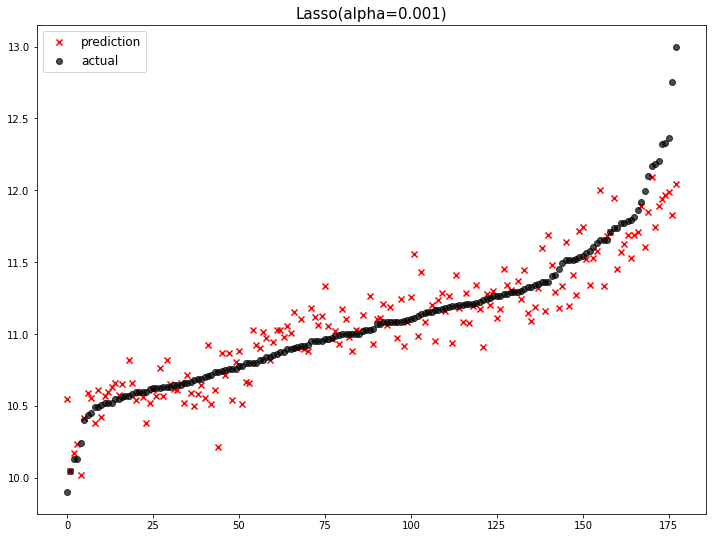

In [41]:
plot_predictions(meta_model_lasso, y_test, final)